### Data Preparation

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.datasets import mnist

%matplotlib inline

2024-01-15 21:02:47.365681: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load daata
(X_train, y_train), (X_val, y_val) = mnist.load_data()

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}')
print(f'y_val: {y_val.shape}')

11490434/11490434 [==============================] - 4s 0us/step
X_train: (60000, 28, 28)
y_train: (60000,)
X_val: (10000, 28, 28)
y_val: (10000,)


In [3]:
# split for test data
X_train = X_train[:-1000]
y_train = y_train[:-1000]

X_test = X_train[-1000:]
y_test = y_train[-1000:]


print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (59000, 28, 28)
y_train: (59000,)
X_test: (1000, 28, 28)
y_test: (1000,)


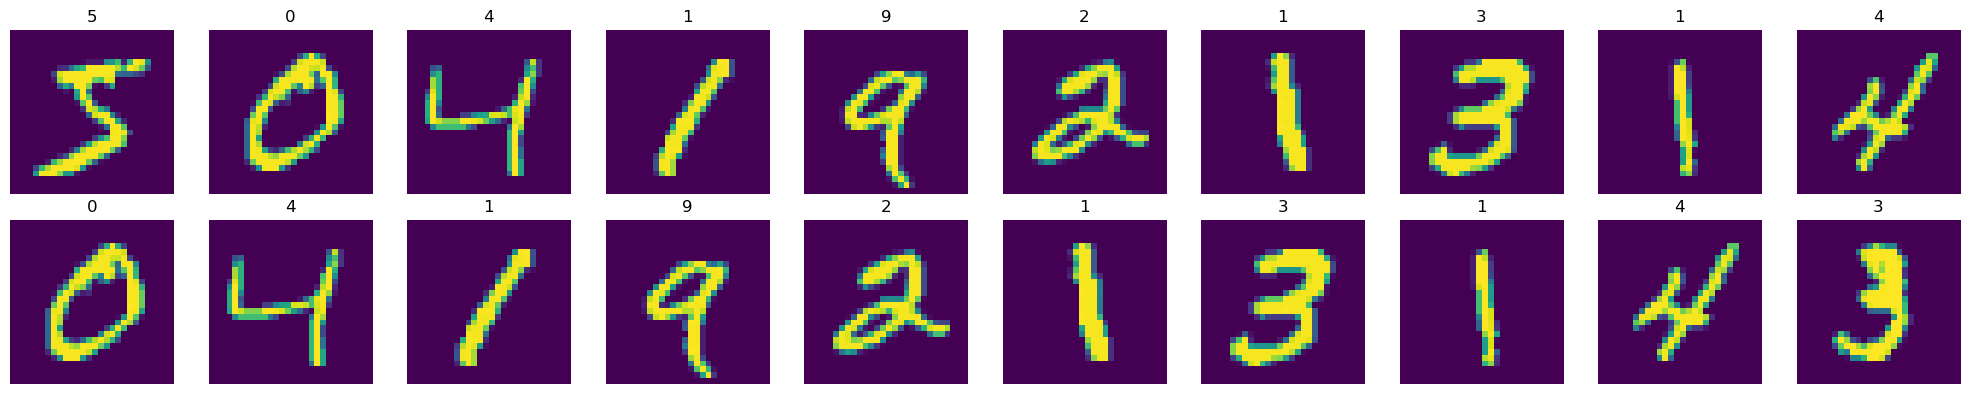

In [4]:
# training data preview
fig,ax = plt.subplots(figsize=(20,4), nrows=2, ncols=10)

for row in range(0,2):
  for col in range(0,10):
    ax[row,col].imshow(X_train[row+col])
    ax[row,col].set_title(y_train[row+col])
    ax[row,col].axis('off')

plt.tight_layout()
plt.show()

In [5]:
# reshape data
X_train = X_train.reshape(59000, 28, 28, 1) # jumlah_data, dimensi_horizontal, dimensi_vertical, jumlah_channel
X_val = X_val.reshape(10000, 28, 28, 1)
X_test = X_test.reshape(1000, 28, 28, 1)


print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'X_val: {X_val.shape}')

X_train: (59000, 28, 28, 1)
X_test: (1000, 28, 28, 1)
X_val: (10000, 28, 28, 1)


### Data Modelling

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [7]:
# build model
model = Sequential([
                    Conv2D(250, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
                    MaxPooling2D(),

                    Conv2D(125, kernel_size=(2,2), activation='relu'),
                    MaxPooling2D(),

                    Conv2D(75, kernel_size=(1,1), activation='relu'),
                    MaxPooling2D(),


                    Flatten(),
                    Dense(25, activation='relu'),
                    Dense(10, activation='softmax')
])

# model preview
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 250)       2500      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 250)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 125)       125125    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 125)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 75)          9450      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 75)         0

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# training started
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    epochs=10
                    )

Epoch 1/10
1844/1844 [==============================] - 266s 144ms/step - loss: 1.6083 - accuracy: 0.3400 - val_loss: 1.3339 - val_accuracy: 0.4328
Epoch 2/10
1844/1844 [==============================] - 252s 137ms/step - loss: 0.8467 - accuracy: 0.6889 - val_loss: 0.2019 - val_accuracy: 0.9433
Epoch 3/10
1844/1844 [==============================] - 232s 126ms/step - loss: 0.1195 - accuracy: 0.9645 - val_loss: 0.0772 - val_accuracy: 0.9756
Epoch 4/10
1844/1844 [==============================] - 250s 136ms/step - loss: 0.0765 - accuracy: 0.9763 - val_loss: 0.0678 - val_accuracy: 0.9797
Epoch 5/10
1844/1844 [==============================] - 246s 133ms/step - loss: 0.0630 - accuracy: 0.9800 - val_loss: 0.0608 - val_accuracy: 0.9828
Epoch 6/10
1844/1844 [==============================] - 206s 112ms/step - loss: 0.0563 - accuracy: 0.9824 - val_loss: 0.0874 - val_accuracy: 0.9715
Epoch 7/10
 899/1844 [=============>................] - ETA: 1:41 - loss: 0.0463 - accuracy: 0.9859

KeyboardInterrupt: 

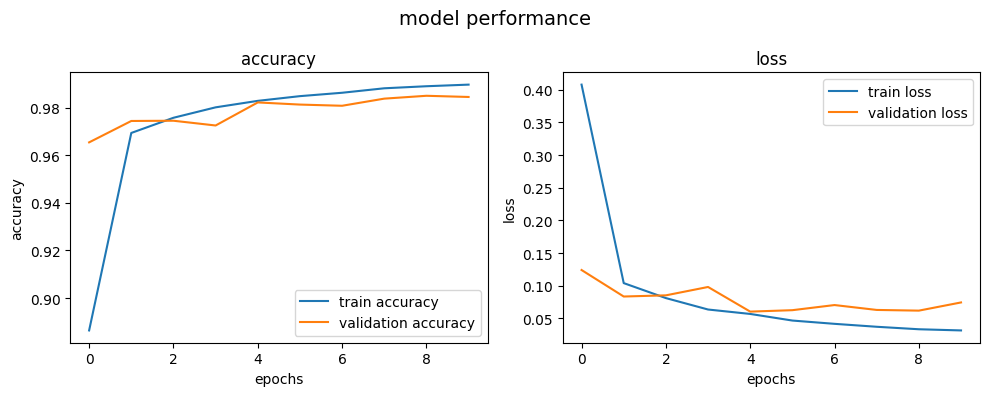

In [ ]:
fig,ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)

plt.suptitle('model performance', fontsize=14)
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].legend(['train accuracy', 'validation accuracy'])
ax[0].set_title('accuracy', fontsize=12)
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].legend(['train loss', 'validation loss'])
ax[1].set_title('loss', fontsize=12)
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epochs')

plt.tight_layout()
plt.show()

In [ ]:
# testing
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 5ms/step


In [ ]:
np.argmax(y_pred[0])

2

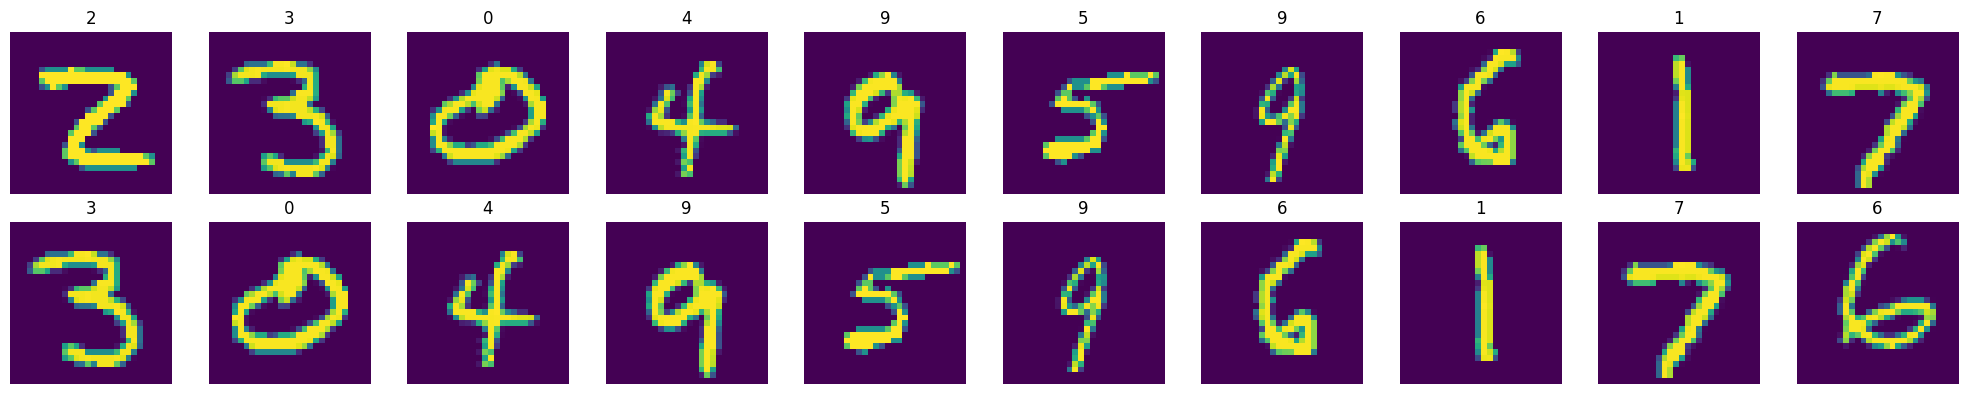

In [ ]:
# training data preview
fig,ax = plt.subplots(figsize=(20,4), nrows=2, ncols=10)

for row in range(0,2):
  for col in range(0,10):
    ax[row,col].imshow(X_test[row+col].reshape(28,28)) # data image
    ax[row,col].set_title(np.argmax(y_pred[row+col])) # label
    ax[row,col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
prediction=[]
for pred in y_pred:
  prediction.append(np.argmax(pred))


prediction = np.array(prediction) # konversi list ke array

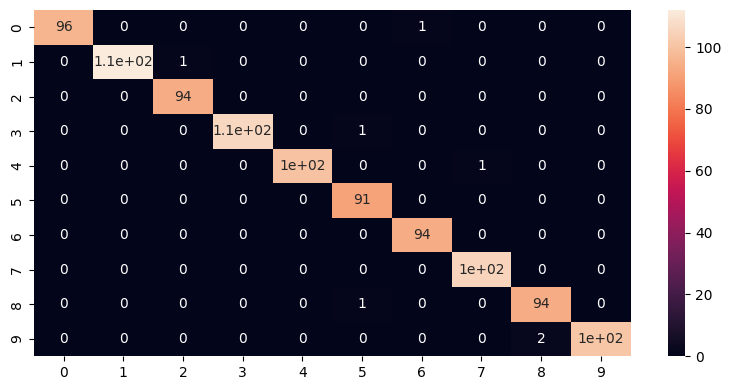

In [ ]:
plt.figure(figsize=(8,4))

cm = confusion_matrix(prediction, y_test)
sns.heatmap(cm, annot=True)

plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        97
           1       1.00      0.99      1.00       113
           2       0.99      1.00      0.99        94
           3       1.00      0.99      1.00       107
           4       1.00      0.99      1.00       101
           5       0.98      1.00      0.99        91
           6       0.99      1.00      0.99        94
           7       0.99      1.00      1.00       105
           8       0.98      0.99      0.98        95
           9       1.00      0.98      0.99       103

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
import cv2
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image

In [ ]:
canvas_html = """
<canvas width=%d height=%d style="border:1px solid #000000;"></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.jpg', w=300, h=300, line_width=20):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)

# execute function
draw()

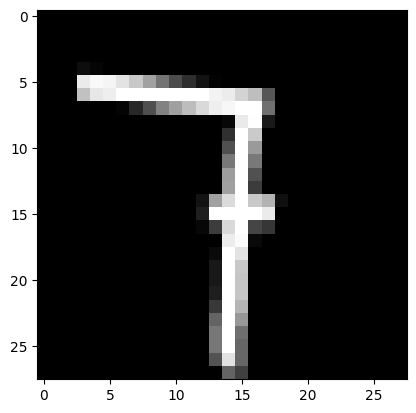

1/1 [==============================] - 0s 85ms/step

the number is: 7


In [ ]:
# load image
img = Image.open('drawing.jpg')
img = np.array(img)[:,:,3]
# resize image
img_resize = cv2.resize(img, (28, 28),interpolation = cv2.INTER_AREA)
# show image
plt.imshow(img_resize, cmap='gray')
plt.show()


# do prediction
y_pred = model.predict(img_resize.reshape((1,28,28,1)))
print(f'\nthe number is: {str(np.argmax(y_pred[0]))}')